In [1]:
import pandas as pd
import seaborn as sns

In [2]:
data=pd.read_csv('D:/Afumoons/OneDrive/Matkul/Data Mining/train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.insert(value=data.Name.map(lambda name: name.split(",")[1].split(".")[0].strip()),loc=12,column="Title")

In [5]:
title_map={"Capt":"Officer",
           "Col":"Officer",
           "Major":"Officer",
           "Johkheer":"Royalty",
           "Don":"Royalty",
           "Sir":"Royalty",
           "Dr":"Royalty",
           "Rev":"Officer",
           "The Countess":"Royalty",
           "Dona":"Royalty",
           "Mme":"Mrs",
           "Mlle":"Miss",
           "Ms":"Mrs",
           "Mr":"Mr",
           "Mrs":"Mrs",
           "Miss":"Miss",
           "Master":"Master",
           "Lady":"Officer"}
data["Title"]=data.Title.map(title_map)

In [6]:
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss


In [7]:
data["Title"].value_counts()

Mr         517
Miss       184
Mrs        127
Master      40
Officer     12
Royalty      9
Name: Title, dtype: int64

In [8]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            2
dtype: int64

In [9]:
def passenger_type (row):
    if row['Age']<2:
        return 'Infant'
    elif (row['Age']>=2 and row['Age']<12):
        return 'Child'
    elif (row['Age']>=12 and row['Age']<18):
        return 'Youth'
    elif (row['Age']>=18 and row['Age']<65):
        return 'Adult'
    elif row['Age']>=65:
        return 'Senior'
    elif row['Title']>='Master':
        return 'Adult'
    elif row['Title']>='Miss':
        return 'Youth'
    elif row['Title']>='Mr' or row['Title']=='Mrs':
        return 'Adult'
    else:
        return 'Unknown'

In [10]:
data['PassengerType']=data.apply(lambda row: passenger_type(row),axis=1)

In [11]:
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,PassengerType
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Adult


In [12]:
data["PassengerType"].value_counts()

Adult     767
Child      54
Youth      45
Infant     14
Senior     11
Name: PassengerType, dtype: int64

In [13]:
sex_map={"male":1,"female":0}
data["Sex"]=data["Sex"].map(sex_map)

In [14]:
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,PassengerType
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Adult
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Adult


In [15]:
passengertype_map={"Unknown":0,"Infant":1,"Child":2,"Youth":3,"Adult":4,"Senior":5}
data["PassengerType"]=data["PassengerType"].map(passengertype_map)

In [16]:
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,PassengerType
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,4
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,4


In [17]:
kolom = ['Name', 'Age']
data2 = pd.read_csv('D:/Afumoons/OneDrive/Matkul/Data Mining/train.csv', usecols=kolom, nrows=12)
data2.insert(value=data2.Name.map(lambda name: name.split(",")[1].split(".")[0].strip()),loc=2,column="Title")
data2["Title"]=data2.Title.map(title_map)
data2['PassengerType']=data2.apply(lambda row: passenger_type(row),axis=1)
data2.head()

,Name,Age,Title,PassengerType
0,"Braund, Mr. Owen Harris",22.0,Mr,Adult
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,Mrs,Adult
2,"Heikkinen, Miss. Laina",26.0,Miss,Adult
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,Mrs,Adult
4,"Allen, Mr. William Henry",35.0,Mr,Adult


In [18]:
#Nominal
nencode = pd.get_dummies(data2['Name'])
nencode.head()

,"Allen, Mr. William Henry","Bonnell, Miss. Elizabeth","Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Thayer)","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Heikkinen, Miss. Laina","Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)","McCarthy, Mr. Timothy J","Moran, Mr. James","Nasser, Mrs. Nicholas (Adele Achem)","Palsson, Master. Gosta Leonard","Sandstrom, Miss. Marguerite Rut"
0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0


In [19]:
data3 = pd.concat([data2, nencode], axis='columns')
data3

,Name,Age,Title,PassengerType,"Allen, Mr. William Henry","Bonnell, Miss. Elizabeth","Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Thayer)","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Heikkinen, Miss. Laina","Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)","McCarthy, Mr. Timothy J","Moran, Mr. James","Nasser, Mrs. Nicholas (Adele Achem)","Palsson, Master. Gosta Leonard","Sandstrom, Miss. Marguerite Rut"
0,"Braund, Mr. Owen Harris",22.0,Mr,Adult,0,0,1,0,0,0,0,0,0,0,0,0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,Mrs,Adult,0,0,0,1,0,0,0,0,0,0,0,0
2,"Heikkinen, Miss. Laina",26.0,Miss,Adult,0,0,0,0,0,1,0,0,0,0,0,0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,Mrs,Adult,0,0,0,0,1,0,0,0,0,0,0,0
4,"Allen, Mr. William Henry",35.0,Mr,Adult,1,0,0,0,0,0,0,0,0,0,0,0
5,"Moran, Mr. James",NaN,Mr,Adult,0,0,0,0,0,0,0,0,1,0,0,0
6,"McCarthy, Mr. Timothy J",54.0,Mr,Adult,0,0,0,0,0,0,0,1,0,0,0,0
7,"Palsson, Master. Gosta Leonard",2.0,Master,Child,0,0,0,0,0,0,0,0,0,0,1,0
8,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,Mrs,Adult,0,0,0,0,0,0,1,0,0,0,0,0
9,"Nasser, Mrs. Nicholas (Adele Achem)",14.0,Mrs,Youth,0,0,0,0,0,0,0,0,0,1,0,0


In [20]:
data3.drop(columns=["Name","Age","Title"], inplace=True)
data3

,PassengerType,"Allen, Mr. William Henry","Bonnell, Miss. Elizabeth","Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Thayer)","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Heikkinen, Miss. Laina","Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)","McCarthy, Mr. Timothy J","Moran, Mr. James","Nasser, Mrs. Nicholas (Adele Achem)","Palsson, Master. Gosta Leonard","Sandstrom, Miss. Marguerite Rut"
0,Adult,0,0,1,0,0,0,0,0,0,0,0,0
1,Adult,0,0,0,1,0,0,0,0,0,0,0,0
2,Adult,0,0,0,0,0,1,0,0,0,0,0,0
3,Adult,0,0,0,0,1,0,0,0,0,0,0,0
4,Adult,1,0,0,0,0,0,0,0,0,0,0,0
5,Adult,0,0,0,0,0,0,0,0,1,0,0,0
6,Adult,0,0,0,0,0,0,0,1,0,0,0,0
7,Child,0,0,0,0,0,0,0,0,0,0,1,0
8,Adult,0,0,0,0,0,0,1,0,0,0,0,0
9,Youth,0,0,0,0,0,0,0,0,0,1,0,0


In [21]:
#Ordinal
data3['PassengerType'].replace(passengertype_map, inplace=True)
data3

,PassengerType,"Allen, Mr. William Henry","Bonnell, Miss. Elizabeth","Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Thayer)","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Heikkinen, Miss. Laina","Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)","McCarthy, Mr. Timothy J","Moran, Mr. James","Nasser, Mrs. Nicholas (Adele Achem)","Palsson, Master. Gosta Leonard","Sandstrom, Miss. Marguerite Rut"
0,4,0,0,1,0,0,0,0,0,0,0,0,0
1,4,0,0,0,1,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,1,0,0,0,0,0,0
3,4,0,0,0,0,1,0,0,0,0,0,0,0
4,4,1,0,0,0,0,0,0,0,0,0,0,0
5,4,0,0,0,0,0,0,0,0,1,0,0,0
6,4,0,0,0,0,0,0,0,1,0,0,0,0
7,2,0,0,0,0,0,0,0,0,0,0,1,0
8,4,0,0,0,0,0,0,1,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,1,0,0


In [22]:
def titanic_corr(data):
  correlation=data.corr()
  sns.heatmap(correlation, annot=True, cbar=True, cmap="RdYlGn")

In [23]:
data.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,PassengerType
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.036847,-0.057527,-0.001652,0.012658,0.010215
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.077221,-0.035322,0.081629,0.257307,-0.146584
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.369226,0.083081,0.018443,-0.549500,-0.131452
Sex,0.042939,-0.543351,0.131900,1.000000,0.093254,-0.114631,-0.245489,-0.182333,0.096673
Age,0.036847,-0.077221,-0.369226,0.093254,1.000000,-0.308247,-0.189119,0.096067,0.672077
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.308247,1.000000,0.414838,0.159651,-0.345670
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.189119,0.414838,1.000000,0.216225,-0.358976
Fare,0.012658,0.257307,-0.549500,-0.182333,0.096067,0.159651,0.216225,1.000000,0.002842
PassengerType,0.010215,-0.146584,-0.131452,0.096673,0.672077,-0.345670,-0.358976,0.002842,1.000000


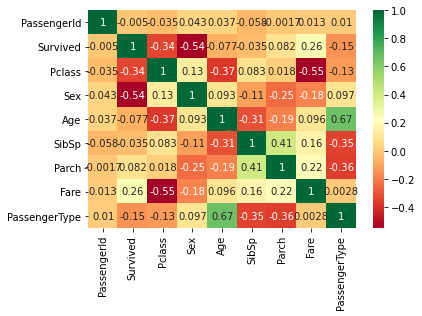

In [24]:
titanic_corr(data)

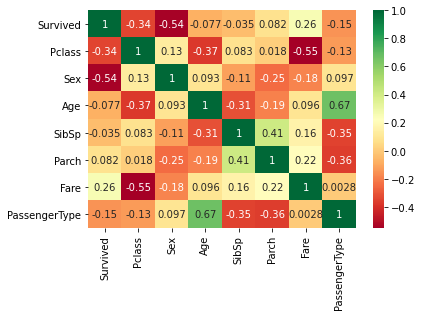

In [25]:
data.drop(["PassengerId"], inplace=True, axis=1)
titanic_corr(data)

In [26]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,PassengerType
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,4
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,4
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,4
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,Mrs,4
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,Mr,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S,Officer,4
887,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S,Miss,4
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss,4
889,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C,Mr,4


In [27]:
data.drop(["Name","Age","Ticket","Cabin","Embarked"], inplace=True, axis=1)
data.head(3)

,Survived,Pclass,Sex,SibSp,Parch,Fare,Title,PassengerType
0,0,3,1,1,0,7.2500,Mr,4
1,1,1,0,1,0,71.2833,Mrs,4
2,1,3,0,0,0,7.9250,Miss,4


In [28]:
def title_type (row):
    if row['Title']=='Mrs' or row['Title']=='Miss':
        return 1
    elif row['Title']=='Mr':
        return 2
    elif row['Title']=='Officer':
        return 3
    elif row['Title']=='Master':
        return 4
    elif row['Title']=='Royalty':
        return 5
    else:
        return 0

In [29]:
data['Title']=data.apply(lambda row: title_type(row),axis=1)
data.head(3)

,Survived,Pclass,Sex,SibSp,Parch,Fare,Title,PassengerType
0,0,3,1,1,0,7.2500,2,4
1,1,1,0,1,0,71.2833,1,4
2,1,3,0,0,0,7.9250,1,4


In [30]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [31]:
xdata = data.drop('Survived',axis=1)
ydata = data.Survived
xtrain, xtest, ytrain, ytest = train_test_split(xdata, ydata, test_size=0.3, random_state=1)

In [32]:
#Algoritma Decision Tree
clf=DecisionTreeClassifier()
clf=clf.fit(xtrain,ytrain)

In [33]:
ypred_dt = clf.predict(xtest)
ypred_dt

array([1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1], dtype=int64)

In [34]:
#Nilai akurasi
print("Akurasi : ",metrics.accuracy_score(ytest,ypred_dt)*100)

Akurasi :  76.49253731343283


In [35]:
#Algoritma Naive Bayes 
#Import fungsi klasifikasi Naive Bayes
from sklearn.naive_bayes import GaussianNB
modelnb = GaussianNB()

In [36]:
#Memasukkan data training pada fungsi klasifikasi Naive Bayes
nbtrain = modelnb.fit(xtrain, ytrain)
nbtrain.class_count_

array([396., 227.])

In [37]:
#Menentukan hasil prediksi data testing
ypred_nb = nbtrain.predict(xtest)
ypred_nb

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0], dtype=int64)

In [38]:
#Nilai akurasi
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_nb))

              precision    recall  f1-score   support

           0       0.77      0.82      0.79       153
           1       0.74      0.67      0.70       115

    accuracy                           0.76       268
   macro avg       0.75      0.75      0.75       268
weighted avg       0.76      0.76      0.76       268



In [39]:
#Algoritma Support Vector Machine
#Import svm model
from sklearn import svm
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel
#Train the model using the training sets
clf.fit(xtrain, ytrain)
#Predict the response for test dataset
ypred_svm = clf.predict(xtest)

In [40]:
#Nilai akurasi
print(classification_report(ytest, ypred_svm))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81       153
           1       0.77      0.66      0.71       115

    accuracy                           0.77       268
   macro avg       0.77      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268

